In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import h5py
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('./insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
x = df.drop('charges', axis=1)
y = df['charges']


In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [122]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [123]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [124]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Imputar NaNs con la mediana
    ('scaler', StandardScaler()) # Escalar los datos
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputar NaNs con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convertir a dummies
])

In [125]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
) # Crear el preprocesador

In [126]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [127]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [128]:
full_pipeline.fit(x, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [129]:
predictions = full_pipeline.predict(x)
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757], shape=(1338,))

In [130]:
y.values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603], shape=(1338,))

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [132]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [133]:
y_pred_test = full_pipeline.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, y_pred_test)
print(f"Error cuadratico medio (MSE) en el conjunto de prueba: {mse}")

Error cuadratico medio (MSE) en el conjunto de prueba: 38516525.56482769


In [135]:
rmse_test = np.sqrt(mse)
print(f"Raíz cuadrada del error cuadratico medio (RMSE) en el conjunto de prueba: {rmse_test}")

Raíz cuadrada del error cuadratico medio (RMSE) en el conjunto de prueba: 6206.168348089479


In [136]:
r2_test = r2_score(y_test, y_pred_test)
dato = r2_test * 100
print(f"Coeficiente de determinación (R^2) en el conjunto de prueba: {dato}")

Coeficiente de determinación (R^2) en el conjunto de prueba: 73.89431489232598


In [137]:
nombre_archivo = 'modelo.joblib'
joblib.dump(full_pipeline, nombre_archivo)
print(f"Modelo guardado en {nombre_archivo}")

Modelo guardado en modelo.joblib


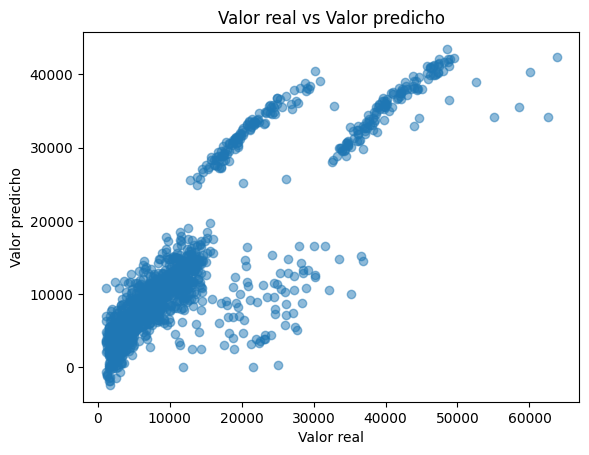

In [140]:


plt.scatter(y_test, y_pred_test, alpha=0.5)
from sklearn.linear_model import LinearRegression
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valor real vs Valor predicho')
plt.show()

